# pandas: práctica y ejercicios

por [Manuel López Sheriff](https://www.linkedin.com/in/sheriff-data/)

**NOTAS**
 - Hay muchas formas de resolver cada problema, encuentra la tuya.
 - Crea las celdas extra que necesites.
 - Recuerda que una celda puede ser de tipo Código, o de tipo Markdown. Utiliza las segundas para escribir texto y explicaciones si lo precisas.
 - Intenta crear variables a la hora de resolver los ejercicios.
 - Puedes apoyarte en internet: todos los programadores lo hacemos a diario.

<img width=500 src="https://upload.wikimedia.org/wikipedia/commons/3/31/TitanicBeken.jpg">

Importamos el csv del titanic a un dataframe

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("../datasets/titanic.csv")

Echa un vistazo a las primeras filas del dataframe

In [3]:
df.head()

,Name,Sex,Age,Pclass,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
0,"Karaic, Mr. Milan",male,30.0,3,0,0,349246,7.8958,NaN,S,0
1,"Dean, Mrs. Bertram",female,33.0,3,1,2,C.A. 2315,20.5750,NaN,S,1
2,"Rice, Mrs. William",female,39.0,3,0,5,382652,29.1250,NaN,Q,0
3,"Davidson, Mrs. Thornton",female,27.0,1,1,2,F.C. 12750,52.0000,B71,S,1
4,"Ridsdale, Miss. Lucy",female,50.0,2,0,0,W./C. 14258,10.5000,NaN,S,1


Cuántos pasajeros hay en este dataframe?

In [9]:
print(f"En el dataframe hay {df.shape[0]} pasajeros")

En el dataframe hay 1309 pasajeros


Cuáles son las columnas del dataframe?

In [13]:
df.columns

Index(['Name', 'Sex', 'Age', 'Pclass', 'SibSp', 'Parch', 'Ticket', 'Fare',
       'Cabin', 'Embarked', 'Survived'],
      dtype='object')

Enumera las columnas de tipo numérico

In [22]:
df.dtypes

Name         object
Sex          object
Age         float64
Pclass        int64
SibSp         int64
Parch         int64
Ticket       object
Fare        float64
Cabin        object
Embarked     object
Survived      int64
dtype: object

In [29]:
for c in df.select_dtypes(include=[float, int]).columns:
    print(c)

Age
Pclass
SibSp
Parch
Fare
Survived


Cuál es la edad media de los pasajeros? Y la mediana? Cómo interpretas el resultado?

In [45]:
df.Age.mean().round(1)

29.9

In [46]:
df.Age.median().round(1)

28.0

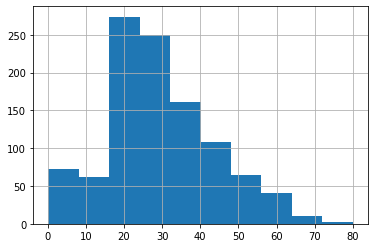

In [47]:
df.Age.hist()

[Symmetry, mean and median of a distribution](https://openstax.org/books/introductory-business-statistics/pages/2-6-skewness-and-the-mean-median-and-mode)

Cuánto costó el billete más caro? Quién lo pagó?

In [48]:
df.head()

,Name,Sex,Age,Pclass,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
0,"Karaic, Mr. Milan",male,30.0,3,0,0,349246,7.8958,NaN,S,0
1,"Dean, Mrs. Bertram",female,33.0,3,1,2,C.A. 2315,20.5750,NaN,S,1
2,"Rice, Mrs. William",female,39.0,3,0,5,382652,29.1250,NaN,Q,0
3,"Davidson, Mrs. Thornton",female,27.0,1,1,2,F.C. 12750,52.0000,B71,S,1
4,"Ridsdale, Miss. Lucy",female,50.0,2,0,0,W./C. 14258,10.5000,NaN,S,1


In [49]:
df.Fare.max()

512.3292

In [53]:
df[df.Fare == df.Fare.max()]

,Name,Sex,Age,Pclass,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
255,"Cardeza, Mrs. James Warburton Martinez",female,58.0,1,0,1,PC 17755,512.3292,B51 B53 B55,C,1
272,"Lesurer, Mr. Gustave J",male,35.0,1,0,0,PC 17755,512.3292,B101,C,1
543,"Cardeza, Mr. Thomas Drake Martinez",male,36.0,1,0,1,PC 17755,512.3292,B51 B53 B55,C,1
1152,"Ward, Miss. Anna",female,35.0,1,0,0,PC 17755,512.3292,NaN,C,1


Cuánto pagaron entre todos los pasajeros?

In [57]:
df.Fare.sum()

43550.4869

Habría que chequear si hay algún dato faltante:

In [59]:
df.Fare.isna().sum()

1

In [62]:
df[df.Fare.isna()]

,Name,Sex,Age,Pclass,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
73,"Storey, Mr. Thomas",male,60.5,3,0,0,3701,NaN,NaN,S,0


Quién era el pasajero más joven y qué edad tenía?

In [63]:
df.Age.min()

0.17

In [66]:
df[df.Age == df.Age.min()]

,Name,Sex,Age,Pclass,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
151,"Dean, Miss. Elizabeth Gladys Millvina",female,0.17,3,1,2,C.A. 2315,20.575,NaN,S,1


Cuántos pasajeros eran menores de 20? Qué porcentaje?

In [71]:
(df.Age < 20).sum()

225

In [74]:
perc = (df.Age < 20).sum() / df.shape[0] * 100
print(f"El porcentaje de menores de 20 es {perc.round(1)}%")

Cual es el decil 9 de la edad?

In [79]:
df.Age.quantile(0.9)

50.0

En efecto, y teniendo en cuenta solamente la gente con la edad informada...

In [88]:
df_edad_informada = df[df.Age.notna()]

In [89]:
df_edad_informada.shape

(1046, 11)

In [94]:
(df_edad_informada.Age < 50).mean().round(2)

0.89

Cuánta gente sobrevivió? Cuánta murió?

In [97]:
df.Survived.value_counts()

0    809
1    500
Name: Survived, dtype: int64

Cuánta gente viajaba en cada clase?

In [101]:
df.Pclass.value_counts()

3    709
1    323
2    277
Name: Pclass, dtype: int64

Era más probable sobrevivir siendo de primera clase?

In [103]:
pd.crosstab(df.Pclass, df.Survived)

Survived,0,1
Pclass,,
1,123,200
2,158,119
3,528,181


Era más probable sobrevivir siendo mujer?

In [140]:
pd.crosstab(df.Sex, df.Survived)

Survived,0,1
Sex,,
female,127,339
male,682,161


Con cuántos familiares viajaba la gente? (informado en la columna SibSp)

In [105]:
df.SibSp.value_counts()

0    891
1    319
2     42
4     22
3     20
8      9
5      6
Name: SibSp, dtype: int64

Cuántas puertas de embarque había?

In [144]:
df.Embarked.nunique()

3

Crea un dataframe con las personas que viajaban en primera clase

In [146]:
df.Pclass.unique()

array([3, 1, 2])

Es recomendable usar `.copy()`

In [165]:
df_primera = df[df.Pclass == 1].copy()

In [153]:
df_primera.sample(5)

,Name,Sex,Age,Pclass,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
982,"Rood, Mr. Hugh Roscoe",male,NaN,1,0,0,113767,50.0,A32,S,0
1141,"Woolner, Mr. Hugh",male,NaN,1,0,0,19947,35.5,C52,S,1
1059,"Chisholm, Mr. Roderick Robert Crispin",male,NaN,1,0,0,112051,0.0,NaN,S,0
1296,"Carrau, Mr. Jose Pedro",male,17.0,1,0,0,113059,47.1,NaN,S,0
1025,"Burns, Miss. Elizabeth Margaret",female,41.0,1,0,0,16966,134.5,E40,C,1


Crea un dataframe que contenga mujeres y niños

In [166]:
df_females_and_kids = df[(df.Sex == "female") | (df.Age < 18)].copy()

In [167]:
df_females_and_kids.sample(5)

,Name,Sex,Age,Pclass,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
539,"Flegenheim, Mrs. Alfred",female,NaN,1,0,0,PC 17598,31.6833,NaN,S,1
694,"Douglas, Mrs. Walter Donald",female,48.0,1,1,0,PC 17761,106.4250,C86,C,1
182,"Peter, Mrs. Catherine",female,NaN,3,0,2,2668,22.3583,NaN,C,1
292,"Mellinger, Miss. Madeleine Violet",female,13.0,2,0,1,250644,19.5000,NaN,S,1
363,"Elias, Mr. Tannous",male,15.0,3,1,1,2695,7.2292,NaN,C,0


Crea un dataframe con la gente que no viajara en la `S`

In [169]:
df_no_s = df[df.Embarked != "S"].copy()

In [170]:
df_no_s.sample(5)

,Name,Sex,Age,Pclass,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
963,"Hegarty, Miss. Hanora ""Nora""",female,18.0,3,0,0,365226,6.7500,NaN,Q,0
671,"Novel, Mr. Mansouer",male,28.5,3,0,0,2697,7.2292,NaN,C,0
500,"Ross, Mr. John Hugo",male,36.0,1,0,0,13049,40.1250,A10,C,0
742,"Fleming, Miss. Honora",female,NaN,3,0,0,364859,7.7500,NaN,Q,0
1302,"Cassebeer, Mrs. Henry Arthur Jr",female,NaN,1,0,0,17770,27.7208,NaN,C,1


In [176]:
(df.Embarked != "S").mean()

0.3017570664629488

Crea un dataframe con todas las "Miss"

In [180]:
df_miss = df[df.Name.str.contains("Miss")]

In [181]:
df_miss.sample(5)

,Name,Sex,Age,Pclass,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
725,"Laroche, Miss. Louise",female,1.0,2,1,2,SC/Paris 2123,41.5792,NaN,C,1
444,"Longley, Miss. Gretchen Fiske",female,21.0,1,0,0,13502,77.9583,D9,S,1
1090,"Goodwin, Miss. Jessie Allis",female,10.0,3,5,2,CA 2144,46.9000,NaN,S,0
773,"Abelseth, Miss. Karen Marie",female,16.0,3,0,0,348125,7.6500,NaN,S,1
1139,"Phillips, Miss. Kate Florence",female,19.0,2,0,0,250655,26.0000,NaN,S,1


Crea una columna que almacene el primer apellido del pasajero

In [187]:
def get_surname(full_name):
    return full_name.split(",")[0]

In [189]:
get_surname("Lopez, Manolete")

'Lopez'

In [190]:
get_surname("Phillips, Miss. Kate Florence")

'Phillips'

In [192]:
df["surname"] = df.Name.apply(get_surname)

In [193]:
df.sample(5)

,Name,Sex,Age,Pclass,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived,surname
190,"Aldworth, Mr. Charles Augustus",male,30.0,2,0,0,248744,13.0000,NaN,S,0,Aldworth
1284,"Arnold-Franchi, Mr. Josef",male,25.0,3,1,0,349237,17.8000,NaN,S,0,Arnold-Franchi
142,"Moor, Mrs.",female,27.0,3,0,1,392096,12.4750,E121,S,1,Moor
1246,"Francatelli, Miss. Laura Mabel",female,30.0,1,0,0,PC 17485,56.9292,E36,C,1,Francatelli
138,"Vander Cruyssen, Mr. Victor",male,47.0,3,0,0,345765,9.0000,NaN,S,0,Vander Cruyssen


In [195]:
df.surname.value_counts().head()

Sage         11
Andersson    11
Goodwin       8
Asplund       8
Davies        7
Name: surname, dtype: int64

Crea una columna booleana que almacene si el pasajero es mayor de edad

In [202]:
df["is_over_18"] = df.Age >= 18

In [208]:
df.sample(5)

,Name,Sex,Age,Pclass,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived,surname,is_over_18
1068,"Hippach, Miss. Jean Gertrude",female,16.0,1,0,1,111361,57.9792,B18,C,1,Hippach,False
1016,"Karun, Miss. Manca",female,4.0,3,0,1,349256,13.4167,NaN,C,1,Karun,False
28,"Svensson, Mr. Olof",male,24.0,3,0,0,350035,7.7958,NaN,S,0,Svensson,True
793,"Andreasson, Mr. Paul Edvin",male,20.0,3,0,0,347466,7.8542,NaN,S,0,Andreasson,True
322,"Graham, Miss. Margaret Edith",female,19.0,1,0,0,112053,30.0000,B42,S,1,Graham,True


Crea una columna con el año de nacimiento del pasajero

In [212]:
df["birth_year"] = 1912 - df.Age

In [215]:
df.sample(5)

,Name,Sex,Age,Pclass,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived,surname,is_over_18,birth_year
208,"Andersson, Mrs. Anders Johan",female,39.0,3,1,5,347082,31.2750,NaN,S,0,Andersson,True,1873.0
709,"Baxter, Mrs. James",female,50.0,1,0,1,PC 17558,247.5208,B58 B60,C,1,Baxter,True,1862.0
515,"Goldsmith, Master. Frank John William ""Frankie""",male,9.0,3,0,2,363291,20.5250,NaN,S,1,Goldsmith,False,1903.0
1021,"McCarthy, Miss. Catherine Katie",female,NaN,3,0,0,383123,7.7500,NaN,Q,1,McCarthy,False,NaN
587,"Brown, Mrs. James Joseph",female,44.0,1,0,0,PC 17610,27.7208,B4,C,1,Brown,True,1868.0


Eran más caros los billetes de primera clase?

[pandas groupby documentation](https://pandas.pydata.org/docs/user_guide/groupby.html)

In [227]:
df.groupby("Pclass").Fare.mean().round(1)

Pclass
1    87.5
2    21.2
3    13.3
Name: Fare, dtype: float64

Eran más jovenes los hombres que las mujeres del titanic?

In [228]:
df.groupby("Sex").Age.mean().round(1)

Sex
female    28.7
male      30.6
Name: Age, dtype: float64

Afectó el número de familiares a la probabilidad de sobrevivir?

In [232]:
df.groupby("SibSp").Survived.mean().round(3) * 100

SibSp
0    34.7
1    51.1
2    45.2
3    30.0
4    13.6
5     0.0
8     0.0
Name: Survived, dtype: float64

Parece que era mejor tener 1 o 2 hermanos que 0 hermanos

Crea una columna que almacene si el número de ticket del pasajero contiene alguna letra. Define para ello una función y usa `apply`

In [234]:
import string

In [239]:
letters = string.ascii_lowercase + string.ascii_lowercase.upper()

In [241]:
def contains_some_letter(phrase):
    for character in phrase:
        if character in letters:
            return True
    
    return False

In [243]:
contains_some_letter("84359245")

False

In [246]:
contains_some_letter("84359ABC")

True

In [247]:
contains_some_letter("C.A. 2315")

True

In [248]:
df["ticket_letter"] = df.Ticket.apply(contains_some_letter)

In [256]:
df.sample(5)

,Name,Sex,Age,Pclass,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived,surname,is_over_18,birth_year,ticket_letter
1266,"Charters, Mr. David",male,21.0,3,0,0,A/5. 13032,7.7333,NaN,Q,0,Charters,True,1891.0,True
110,"Glynn, Miss. Mary Agatha",female,NaN,3,0,0,335677,7.7500,NaN,Q,1,Glynn,False,NaN,False
1019,"Pallas y Castello, Mr. Emilio",male,29.0,2,0,0,SC/PARIS 2147,13.8583,NaN,C,1,Pallas y Castello,True,1883.0,True
917,"Devaney, Miss. Margaret Delia",female,19.0,3,0,0,330958,7.8792,NaN,Q,1,Devaney,True,1893.0,False
1119,"Webber, Mr. James",male,NaN,3,0,0,SOTON/OQ 3101316,8.0500,NaN,S,0,Webber,False,NaN,True


Exporta los datos a un csv llamado `titanic_enriched.csv`

In [273]:
df.to_csv("../datasets/titanic_enriched.csv")